<a href="https://colab.research.google.com/github/rahulramesh1/openAiTest/blob/main/Langchain_RAG_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Langchain


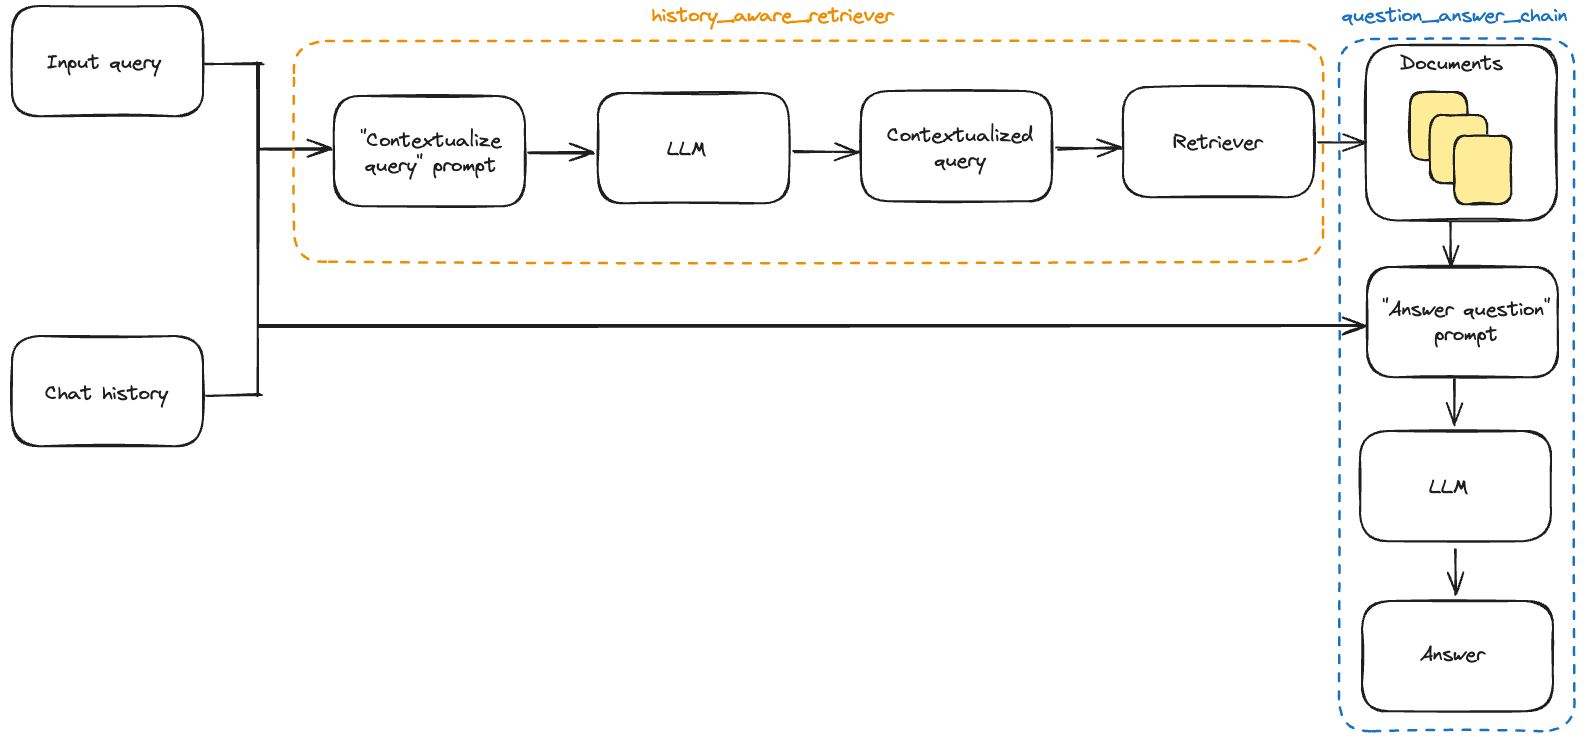

### Installing Helper Packages

In [1]:
!pip install -qU langchain_community pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 4.8 MB/s eta 0:00:00


In [2]:
from langchain_community.document_loaders import PyPDFLoader

### Load and Prepare PDF

In [3]:
pdf_file = "/content/sample_data/New York Brochure.pdf"
loader = PyPDFLoader(pdf_file)

docs = loader.load()

In [4]:
print("len:",len(docs),"\n","content:",docs[0].page_content[205:250])

len: 1 
 content: distributed 
over a land area of about 302.6 


### Configuring Azure OpenAI
Notice how we're using different endpoints for Embeddings and Completions

In [5]:
!pip install -qU langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00


In [6]:
AZURE_OPENAI_ENDPOINT = "https://pikalangchain.openai.azure.com"
AZURE_OPENAI_EMBEDDINGS_ENDPOINT="https://pikalangchain.openai.azure.com/openai/deployments/mytextembedding/embeddings?api-version=2024-02-15-preview"
AZURE_OPENAI_DEPLOYMENT_NAME = "myturbo"
AZURE_OPENAI_API_VERSION = "2024-02-15-preview"
AZURE_OPENAI_API_KEY = "3a9d3a77d1854056bb299bfd7c6060e9"


Adding Azure Configurations to environment variables

In [7]:
import os
os.environ["AZURE_OPENAI_ENDPOINT"] = AZURE_OPENAI_ENDPOINT
os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"] = AZURE_OPENAI_DEPLOYMENT_NAME
os.environ["AZURE_OPENAI_API_VERSION"] = AZURE_OPENAI_API_VERSION
os.environ["AZURE_OPENAI_EMBEDDINGS_ENDPOINT"] = AZURE_OPENAI_EMBEDDINGS_ENDPOINT
os.environ["AZURE_OPENAI_API_KEY"] = AZURE_OPENAI_API_KEY


### Create Chat Model Instance

In [8]:
from langchain_openai import AzureChatOpenAI

In [9]:
model = AzureChatOpenAI(
    azure_endpoint = os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment = os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"],
    openai_api_version = os.environ["AZURE_OPENAI_API_VERSION"]
)

### Preprocess PDF

Installing Chroma for Vector DB support

In [10]:
!pip install -qU langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46

In [11]:
from langchain_chroma import Chroma
from langchain_openai import AzureOpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

Split text, create embeddings and store in vector store (Load, Chunk and Index)

In [12]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
embeddings = AzureOpenAIEmbeddings(azure_endpoint=os.environ["AZURE_OPENAI_EMBEDDINGS_ENDPOINT"])

vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

retriever = vectorstore.as_retriever()

### Create RAG Pipeline

Import the helper functions for RAG pipeline

In [13]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder

Prompt 1 -
```Contextualize the user's query based on chat history```

In [14]:
context_system_prompt = (
    "Given a chat history and the latest user question "
    "which might reference context in the chat history, "
    "formulate a standalone question which can be understood "
    "without the chat history. Do NOT answer the question, "
    "just reformulate it if needed and otherwise return it as is."
)


Template to guide model behaviour.

This template allows to retain context from chat history

In [15]:
messages = [
    ("system", context_system_prompt),
    MessagesPlaceholder("chat_history"),
    ("human", "{input}"),
]
prompt = ChatPromptTemplate.from_messages(messages)

Create ```create_history_aware_retriever``` to fetch relevant context from user's document based on the user's query and the conversation history

In [16]:
context_retriever = create_history_aware_retriever(
    llm=model, retriever=retriever, prompt=prompt
)

Prompt 2 - ```To generate the final answer using the relevant context.```

In [17]:
system_prompt = (
    "You are a helpful assistant for conversations."
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Don't try to make up an answer. "
    "Always answer as concisely as possible."
    "\n\n"
    "{context}"
)

In [18]:
system_prompt

"You are a helpful assistant for conversations.Use the following pieces of retrieved context to answer the question. If you don't know the answer, say that you don't know. Don't try to make up an answer. Always answer as concisely as possible.\n\n{context}"

Template to guide model behaviour.

This template allows to answer user's query with retrieved information

In [19]:
conversation_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

Create a ```context_chain```
which "stuffs" the relevant documents into the language model's prompt, along with the user's query, and returns a response.

In [20]:
context_chain = create_stuff_documents_chain(
    model,
    conversation_prompt
)

Create RAG chain - serves two purposes

1 - Uses the ```context_retriever``` to find relevant text chunks from the vector database (Chroma).

2 - Passes the retrieved context and the question to the language model to generate an answer.

In [21]:
rag_chain = create_retrieval_chain(context_retriever,context_chain)

### Pass, Store and Update Chat History

Import packages to enable dynamic chat history support

In [22]:
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

```RunnableWithMessageHistory``` Wraps the RAG chain to maintain a history of the chat conversation.

```get_session_history``` is a helper function to create a ```ChatMessageHistory``` object for a new ```session_id``` or to retrieve ```ChatMessageHistory``` for an existing ```session_id```

In [23]:
store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]


conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

### Invoking the conversational RAG chain
Presenting answer, and cofiguring a ```session_id``` to store unique chat history

In [25]:
conversational_rag_chain.invoke(
    {"input": "What is the land area of NewYork?"},
    config={
        "configurable": {"session_id": "myuniqueid001"}
    },
)["answer"]

'The land area of New York City is approximately 302.6 square miles.'